# Регрессия

Примим градиентный спуск к для прогнозирования цен на недвижимость в Бостоне. Выясним какое качества на валидации удалось достичь по r2-score и сколько итераций понадобится.

In [3]:
# библиотеки
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.spatial import distance
from matplotlib import pyplot as plt

# выгружаем базу
boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
# разделяем на тренировачный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Итарации закончились на шаге 7404, R2_score=0.581898, distance=0.000200


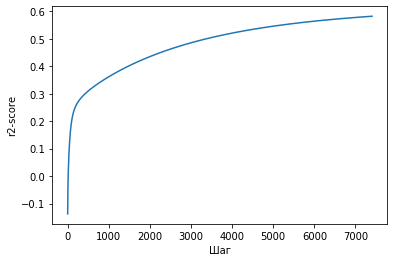

In [6]:
# назначаем градиентный спуск
gradient_regres = SGDRegressor(learning_rate='constant', eta0=0.000001, fit_intercept=True, random_state=42)
# берем рандомное значение
random_value = np.random.random(X_train.shape[1])
# назначаем минимальный шаг
min_step = 0.0002
# переменная для r2-score
r2_evolution = []
# переменная шага
weight_evolution = []

for step in range(10000):
    # частичное предсказание
    step_gradient = gradient_regres.partial_fit(X_train, y_train)
    # определяем шаг и записываем в переменную
    weight_evolution.append(distance.euclidean(random_value, step_gradient.coef_))
    # если шаг меньше минимального
    if weight_evolution[-1] < min_step:
        print("Итарации закончились на шаге %d, R2_score=%f, distance=%f" % (step, r2_score(y_test, step_gradient.predict(X_test)), weight_evolution[-1]) )
        break
    # записываем полученый r2-score
    r2_evolution.append(r2_score(y_test, step_gradient.predict(X_test)))
    # записываем точку на которой остановились
    random_value = step_gradient.coef_.copy()

# выводим график
plt.plot(range(step), r2_evolution)
plt.ylabel('r2-score')
plt.xlabel('Шаг')
plt.show()